# Importing Libraries

In [2]:
# pip install opencv-python

In [3]:
#Importing all the relevant libraries needed.
import pandas as pd
import sklearn
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import array
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import DBSCAN

# Importing datasets

In [4]:
# Reading the csv file "x_train_all.csv"
df = pd.read_csv("x_train_all.csv")

In [5]:
# Reading the csv file "y_train_all.csv"
train_y_df = pd.read_csv("y_train_all.csv")

In [6]:
# Reading the csv file "y_train_all.csv"
test_x_df = pd.read_csv("x_test_all.csv")

In [7]:
# Reading the csv file "y_train_all.csv"
test_y_df = pd.read_csv("y_test_all.csv")

In [8]:
train_y_df['0'].value_counts()

2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
0     210
5     210
Name: 0, dtype: int64

# Data Visulaization and Exploration

In [9]:
# Retrieving the information of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [10]:
# Retrieving the information on the shape of the data.
df.shape

(9690, 2304)

In [11]:
# Printing the first five rows of the data.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


### Pixel Intensity Histogram

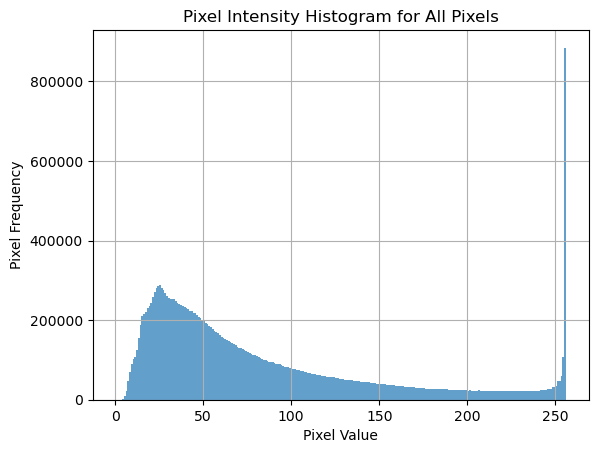

In [12]:
# Flattens the dataframe df into a 1 dimensional array to plot the histogram.
reshaped_df = df.values.ravel()
# Creates the histogram to view the pixel intensity.
plt.hist(reshaped_df, bins=256, range=(0, 256), alpha=0.7)
# Labels the x - axis as Pixel Value.
plt.xlabel('Pixel Value')
# Labels the y - axis as Pixel Frequency.
plt.ylabel('Pixel Frequency')
# Labels the title as Pixel Intensity Histogram for All Pixels.
plt.title('Pixel Intensity Histogram for All Pixels')
# Displays the grid lines on the histogram.
plt.grid(True)
plt.title('Pixel Intensity Histogram for All Pixels')
# Displays the histogram.
plt.show()

### Visualizing the image

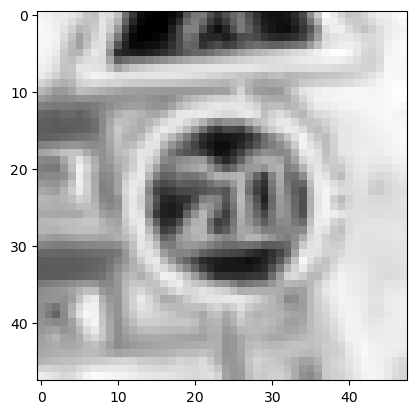

In [13]:
# Storing the images in visualize_img.
visualize_img = df.values

# Viewing the image.
some_digit = visualize_img[2]

# Reshaping the image into 48 x 48 to view it.
some_digit_image = some_digit.reshape(48,48)

# Displaying the image.
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.show()

# Image Enhancement Technique

### Histogram Equalization

In [14]:
# Reshapes the dataframe df into 3D array in the shape 48x48 grid to represent
# in form of image.
def hist_eq(df):
    reshaped_df = df.values.reshape(-1, 48, 48)

    # Initializing the list to store images after applying equalization.
    equalized_df = []

    # Iterating through all the images to apply histogram equalisation.
    for image in reshaped_df:
        # Checking if the image is in the greyscale format and is 8-bit.
        if image.dtype != np.uint8:
            # Converting the image to 8 - bit otherwise.
            image = cv2.convertScaleAbs(image)  # Convert to 8-bit image if needed.

        # Applying histogram equalisation to the image to enchance the contrast.
        equalized_img = cv2.equalizeHist(image)

        # Adding the enchanced image to the equalized_df.
        equalized_df.append(equalized_img)

    # Converting the list into NumPy array.
    equalized_df = np.array(equalized_df)
    return equalized_df


In [15]:
# applying histogram equalization on complete train dataset
equalized_df_train = hist_eq(df)

In [16]:
# applying histogram equalization on test dataset
equalized_df_test = hist_eq(test_x_df)

In [17]:
def convert_array_df(equalized_df):  
    # Storing the no. of images and dimensions of equalized_df.
    n_img, height, width = equalized_df.shape

    # Reshaping the array into two - dimensional array.
    equalized_ndf = equalized_df.reshape(n_img, -1)

    # Converting the array equalized_ndf into a dataframe.
    ndf = pd.DataFrame(equalized_ndf)
    return ndf

In [18]:
#converting train data array into dataframe
ndf_train = convert_array_df(equalized_df_train)

In [19]:
#converting test data array into dataframe
ndf_test = convert_array_df(equalized_df_test)

### Gamma Correction

In [20]:
def gamma_correction(ndf):
    # Setting the gamma value for gamma correction.
    gamma = 0.62
    # Applying gamma correction on the dataframe ndf.
    gamma_corrected_ndf = ndf.apply(lambda x: 255 * (x / 255) ** (1 / gamma))
    return gamma_corrected_ndf

In [21]:
#applying gamma correction on train data 
gamma_corrected_ndf_train = gamma_correction(ndf_train)

In [22]:
#applying gamma correction on test data 
gamma_corrected_ndf_test = gamma_correction(ndf_test)

# Data Preprocessing

### Normalizing the dataset

In [23]:
def normalization(gamma_corrected_ndf):
    # Normalising the dataframe by dividing it with 255 to bring the pixel values in the range of zero to one.
    max_pixel= 255
    # Normalizing the dataframe gamma_corrected_ndf.
    normalized_df = gamma_corrected_ndf.divide(max_pixel)
    return normalized_df

In [24]:
#normalizing train data
normalized_df = normalization(gamma_corrected_ndf_train)

In [25]:
#normalizing test data
normalized_df_test = normalization(gamma_corrected_ndf_test)

In [26]:
# # Normalising the dataframe by dividing it with 255 to bring the pixel values in the range of zero to one.
# max_pixel= 255
# # Normalizing the dataframe gamma_corrected_ndf.
# normalized_df = ndf.divide(max_pixel)

In [27]:
# normalized_df = ndf.copy()

In [28]:
# Printing the first five rows of the normalized_df.
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.015170,0.012679,0.009270,0.038780,0.081784,0.135948,0.257663,0.402310,0.384562,0.415820,...,0.081784,0.020645,0.001761,0.009270,0.046400,0.170000,0.199962,0.189770,0.170000,0.154164
1,0.005387,0.009270,0.025159,0.020645,0.012679,0.009270,0.107567,0.269092,0.515050,0.443346,...,0.170000,0.147996,0.069921,0.015170,0.000402,0.005387,0.052450,0.206869,0.217395,0.217395
2,0.007229,0.015170,0.036957,0.026738,0.050402,0.130071,0.257663,0.288555,0.099552,0.138924,...,0.203404,0.176498,0.121442,0.040636,0.010361,0.004546,0.012679,0.040636,0.130071,0.176498
3,0.003759,0.009270,0.020645,0.063147,0.176498,0.288555,0.320758,0.199962,0.007229,0.228119,...,0.337341,0.166786,0.121442,0.079355,0.038780,0.013903,0.009270,0.013903,0.072237,0.130071
4,0.022112,0.022112,0.016479,0.012679,0.044447,0.113040,0.224523,0.269092,0.094340,0.089236,...,0.196542,0.179782,0.186418,0.196542,0.186418,0.124293,0.054529,0.001229,0.003031,0.012679


In [29]:
# Retrieving the information on the shape of the data.
normalized_df.shape

(9690, 2304)

In [30]:
# Converting the normalized data to an array
data_array = normalized_df.values

### Checking for Null Values

In [31]:
# Checking for any null values in the dataframe.
null_values = normalized_df.isnull().sum().sum()
# Printing the number of null values.
print("Total Number of Null Values:", null_values)

Total Number of Null Values: 0


### Images after applying image enhancement techniques 

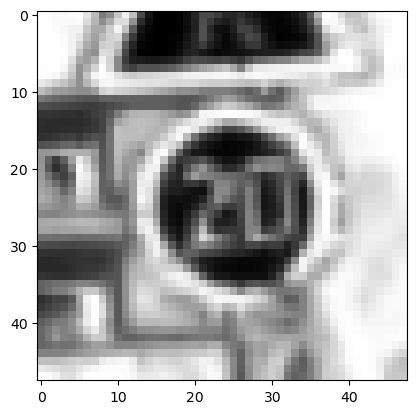

In [32]:
# Storing the images in visualize_img.
visualize_img = normalized_df.values

# Viewing the image.
some_digit = visualize_img[1]

# Reshaping the image into 48 x 48 to view it.
some_digit_image = some_digit.reshape(48,48)

# Displaying the image.
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.show()

## Outlier Mining

### DBSCAN

In [33]:
# Setting the value for epsilon parameter for DBSCAN.
eps = 11.0
# Setting the value for minimum sample parameter for DBSCAN.
min_samples = 80
# Intialsing the model for DBSCAN.
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# Fitting the model to the data_array.
dbscan.fit(data_array)
# Labels all the outliers.
outlier_labels = dbscan.labels_

In [34]:
# Printing the total number of outliers.
num_outliers = np.sum(outlier_labels == -1)
print(f"Number of outliers: {num_outliers}")

Number of outliers: 3680


In [35]:
# Finding all the places where the outliers lie.
outlier_indices = np.where(outlier_labels == -1)[0]
# Coverting it into a list
outlier_indices = outlier_indices.tolist()
# Printing the list of outliers.
# print("Outlier List : ",outlier_indices)

### Scatter Plot for Outlier Visualization

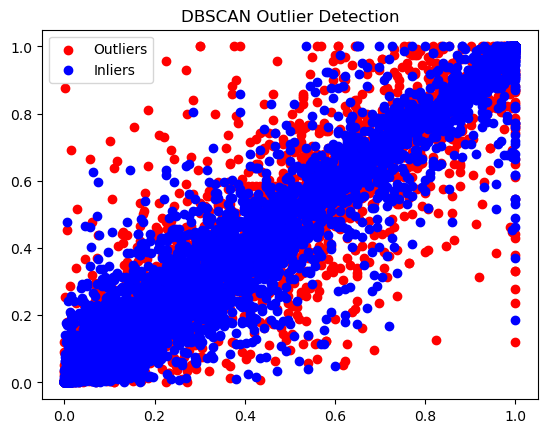

In [36]:
# Creating  a scatter plot to visualize the outliers in the dataset.
plt.scatter(data_array[outlier_labels == -1, 0], data_array[outlier_labels == -1, 1], c='red', label='Outliers')
# Here the red represents the outliers and blue represents inliers.
plt.scatter(data_array[outlier_labels != -1, 0], data_array[outlier_labels != -1, 1], c='blue', label='Inliers')
plt.legend()
# Lablelling the Plot.
plt.title('DBSCAN Outlier Detection')
plt.show()

In [37]:
# Removing all the outliers in the dataframe.
def removeOutliers(dataframe):
    dataframe.drop(dataframe.index[outlier_indices], axis=0, inplace=True)

In [38]:
# Calling the function to  remove the outliers.
removeOutliers(normalized_df)

In [39]:
# Removing the outliers in train_y_df.
removeOutliers(train_y_df)

In [40]:
# Checking the dimension of  train_y_df files after removing the outliers.
train_y_df.shape

(6010, 1)

# Class Data Distribution Visualisation

In [41]:
X_df = pd.read_csv("x_train_all.csv")
y_df = pd.read_csv("y_train_all.csv")

In [42]:
def class_distribution(data):   
    # Counting the occurrences of each class
    class_counts = data.value_counts()

    # Geting the class labels and their counts
    labels = class_counts.index
    counts = class_counts.values

    # Creating a pie chart
    plt.figure(figsize=(8, 8))

    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Class Distribution')

    # Display the chart
    plt.show()

In [43]:
# Loading original (unmodified) CSV files
dy = pd.read_csv('y_train_all.csv')  
dx = pd.read_csv('x_train_all.csv') 

class_ranges = {}
current_class = dy.iloc[0, 0]  # Get first class label
start_row = 0

# Iterate through the y_train_all dataset to find row ranges for each class
for i in range(1, len(dy)):
    if dy.iloc[i, 0] != current_class:
        end_row = i - 1
        class_ranges[current_class] = (start_row, end_row)
        current_class = dy.iloc[i, 0]
        start_row = i

# Adding the last class range
end_row = len(dy) - 1
class_ranges[current_class] = (start_row, end_row)

# Printing the row ranges for each class in y_train_all dataset
print("Row ranges for each class label in y_train:")
for class_label, (start, end) in class_ranges.items():
    print(f"Class {class_label}: Rows {start} to {end}")

# applying same row ranges to x_train_all
class_ranges_x_train = {}

for class_label, (start, end) in class_ranges.items():
    x_train_subset = dx.iloc[start:end+1]
    class_ranges_x_train[class_label] = x_train_subset

# Printing the row ranges for each class label in x_train
print("\nRow ranges for each class label in x_train:")
for class_label, x_train_subset in class_ranges_x_train.items():
    print(f"Class {class_label}: Rows {x_train_subset.index[0]} to {x_train_subset.index[-1]}")

Row ranges for each class label in y_train:
Class 0: Rows 0 to 209
Class 1: Rows 210 to 2429
Class 2: Rows 2430 to 4679
Class 3: Rows 4680 to 6089
Class 4: Rows 6090 to 8069
Class 5: Rows 8070 to 8279
Class 6: Rows 8280 to 8639
Class 7: Rows 8640 to 8879
Class 8: Rows 8880 to 9419
Class 9: Rows 9420 to 9689

Row ranges for each class label in x_train:
Class 0: Rows 0 to 209
Class 1: Rows 210 to 2429
Class 2: Rows 2430 to 4679
Class 3: Rows 4680 to 6089
Class 4: Rows 6090 to 8069
Class 5: Rows 8070 to 8279
Class 6: Rows 8280 to 8639
Class 7: Rows 8640 to 8879
Class 8: Rows 8880 to 9419
Class 9: Rows 9420 to 9689


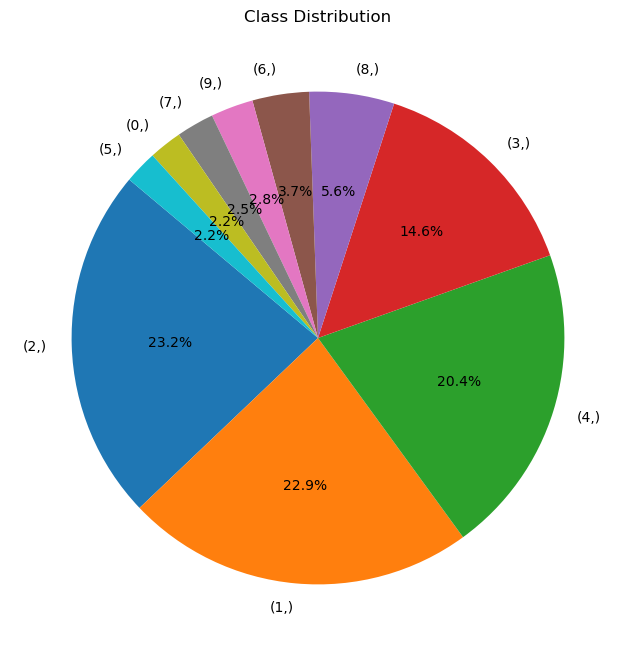

In [44]:
# Loading the data
# data = pd.read_csv('y_train_all.csv')
class_distribution(dy)

# Gauri's Part

## Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [46]:
# Loading CSV files
y = train_y_df.copy() 
X = normalized_df.copy()

C:\Users\revan\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Counter({0: 1639, 1: 1639, 2: 1639, 3: 1639, 4: 1639, 5: 1639, 6: 1639, 7: 1639, 8: 1639, 9: 1639})
Class=0, n=1639 (10.000%)
Class=1, n=1639 (10.000%)
Class=2, n=1639 (10.000%)
Class=3, n=1639 (10.000%)
Class=4, n=1639 (10.000%)
Class=5, n=1639 (10.000%)
Class=6, n=1639 (10.000%)
Class=7, n=1639 (10.000%)
Class=8, n=1639 (10.000%)
Class=9, n=1639 (10.000%)


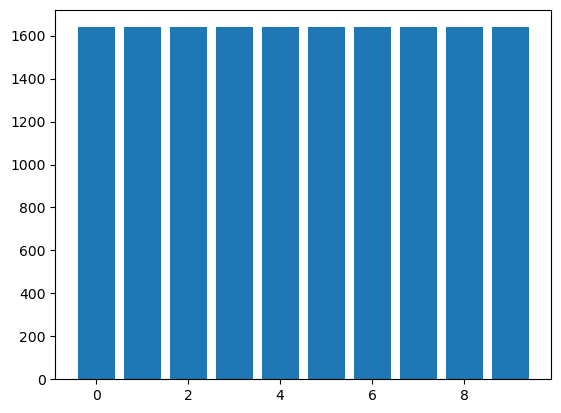

In [47]:
# label encode the target variable
y = LabelEncoder().fit_transform(y)
y = pd.DataFrame(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y.values.ravel())
# summarize distribution
counter = Counter(y)
print(counter)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [48]:
train_y_df = pd.DataFrame(y)
normalized_df = pd.DataFrame(X)

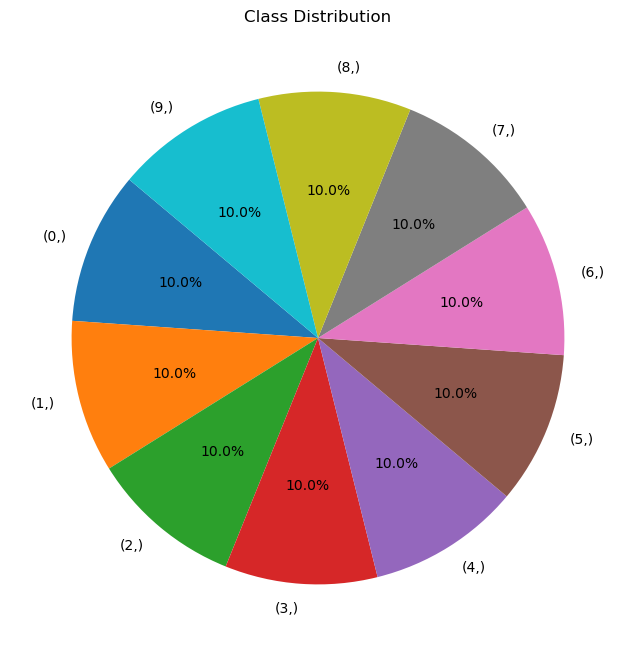

In [49]:
class_distribution(train_y_df)

<!-- # Data Visualisation -->

# Decision Tree Algorithm

In [50]:
# pip install graphviz

In [58]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
import graphviz
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
# Reading the datasets

# df = pd.read_csv("x_train_all.csv")
df=normalized_df.copy()
# train_y_df = pd.read_csv("y_train_all.csv")
# df_test = pd.read_csv("x_test_all.csv")
df_test = normalized_df_test.copy()
# test_y_df = pd.read_csv("y_test_all.csv")

In [60]:
df.shape

(16390, 2304)

In [61]:
train_y_df.shape

(16390, 1)

## Splitting Training data into train and test data

In [62]:
# Converting Train datasets into numpy arrays
X_data = np.array(df)
y_data = np.array(train_y_df)

### Splitting in 70:30 ratio

In [63]:
#splitting in 70:30 ratio (train:test)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3,random_state=42)

In [64]:
#Initializing model
#clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)  
clf_model = DecisionTreeClassifier()


clf_model_cv = DecisionTreeClassifier()

#Training model
clf_model.fit(X_train,y_train)



DecisionTreeClassifier()

#### Using Decision Tree Algorithm on training set and measuring Accuracy

In [65]:
#Getting the predicted classes
y_predict1 = clf_model.predict(X_test)

In [66]:
X_test.shape

(4917, 2304)

In [67]:
y_predict1.shape

(4917,)

In [68]:
#Evaluating the accuracy of the model 
accuracy_score(y_test,y_predict1)

0.9314622737441529

In [69]:
#Printing confusion matrix
confusionMatrix = confusion_matrix(y_test, y_predict1)
print(confusionMatrix)

[[480   1   2   1   0   0   2   0   0   0]
 [  0 415  34  12  22   1   1   0   2   5]
 [  1  29 392  26  21   3   3   1   0   5]
 [  1   6  35 428  12   1   5   1   5   1]
 [  9  18  19  12 440   1   2   1   6   2]
 [  0   0   0   0   0 517   2   0   0   0]
 [  1   1   1   3   0   1 481   2   2   1]
 [  0   0   1   0   0   0   0 482   0   2]
 [  0   0   0   0   0   2   4   0 479   1]
 [  0   0   0   0   0   0   2   1   1 466]]


In [70]:
#Printing Classification Report
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       486
           1       0.88      0.84      0.86       492
           2       0.81      0.81      0.81       481
           3       0.89      0.86      0.88       495
           4       0.89      0.86      0.88       510
           5       0.98      1.00      0.99       519
           6       0.96      0.98      0.97       493
           7       0.99      0.99      0.99       485
           8       0.97      0.99      0.98       486
           9       0.96      0.99      0.98       470

    accuracy                           0.93      4917
   macro avg       0.93      0.93      0.93      4917
weighted avg       0.93      0.93      0.93      4917



### Splitting in 60:40 ratio

In [71]:
#splitting in 60:40 ratio (train:test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data, y_data, test_size = 0.4,random_state=42)

In [72]:
#Initializing model
clf_model1 = DecisionTreeClassifier()

In [73]:
#Training model
clf_model1.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [74]:
#Getting the predicted classes
y_predict1_1 = clf_model.predict(X_test1)

In [75]:
#Evaluating the accuracy of the model 
accuracy_score(y_test1,y_predict1_1)

0.9485967053081147

In [76]:
#Printing confusion matrix
confusionMatrix = confusion_matrix(y_test1, y_predict1_1)
print(confusionMatrix)

[[645   1   2   1   0   0   2   0   0   0]
 [  0 561  34  12  22   1   1   0   2   5]
 [  1  29 552  26  21   3   3   1   0   5]
 [  1   6  35 609  12   1   5   1   5   1]
 [  9  18  19  12 617   1   2   1   6   2]
 [  0   0   0   0   0 683   2   0   0   0]
 [  1   1   1   3   0   1 623   2   2   1]
 [  0   0   1   0   0   0   0 649   0   2]
 [  0   0   0   0   0   2   4   0 664   1]
 [  0   0   0   0   0   0   2   1   1 616]]


In [77]:
#Printing Classification Report
print(classification_report(y_test1, y_predict1_1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       651
           1       0.91      0.88      0.89       638
           2       0.86      0.86      0.86       641
           3       0.92      0.90      0.91       676
           4       0.92      0.90      0.91       687
           5       0.99      1.00      0.99       685
           6       0.97      0.98      0.97       635
           7       0.99      1.00      0.99       652
           8       0.98      0.99      0.98       671
           9       0.97      0.99      0.98       620

    accuracy                           0.95      6556
   macro avg       0.95      0.95      0.95      6556
weighted avg       0.95      0.95      0.95      6556



### Splitting in 80:20 ratio

In [78]:
#splitting in 80:20 ratio (train:test)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data, y_data, test_size = 0.2,random_state=42)

In [79]:
#Initializing model
clf_model2 = DecisionTreeClassifier()

In [80]:
#Training model
clf_model2.fit(X_train2,y_train2)

DecisionTreeClassifier()

In [81]:
#Getting the predicted classes
y_predict1_2 = clf_model.predict(X_test2)

In [82]:
#Evaluating the accuracy of the model 
accuracy_score(y_test2,y_predict1_2)

0.9301403294691886

In [83]:
#Printing confusion matrix
confusionMatrix = confusion_matrix(y_test2, y_predict1_2)
print(confusionMatrix)

[[327   1   1   0   0   0   2   0   0   0]
 [  0 267  21   8  13   0   0   0   2   4]
 [  1  18 252  19  15   3   3   1   0   2]
 [  1   4  29 284   8   1   5   0   4   1]
 [  5  13  12   7 292   1   1   1   2   0]
 [  0   0   0   0   0 358   2   0   0   0]
 [  1   0   1   3   0   0 326   1   1   1]
 [  0   0   1   0   0   0   0 312   0   2]
 [  0   0   0   0   0   2   1   0 321   0]
 [  0   0   0   0   0   0   2   1   1 310]]


In [84]:
#Printing Classification Report
print(classification_report(y_test2, y_predict1_2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       331
           1       0.88      0.85      0.86       315
           2       0.79      0.80      0.80       314
           3       0.88      0.84      0.86       337
           4       0.89      0.87      0.88       334
           5       0.98      0.99      0.99       360
           6       0.95      0.98      0.96       334
           7       0.99      0.99      0.99       315
           8       0.97      0.99      0.98       324
           9       0.97      0.99      0.98       314

    accuracy                           0.93      3278
   macro avg       0.93      0.93      0.93      3278
weighted avg       0.93      0.93      0.93      3278



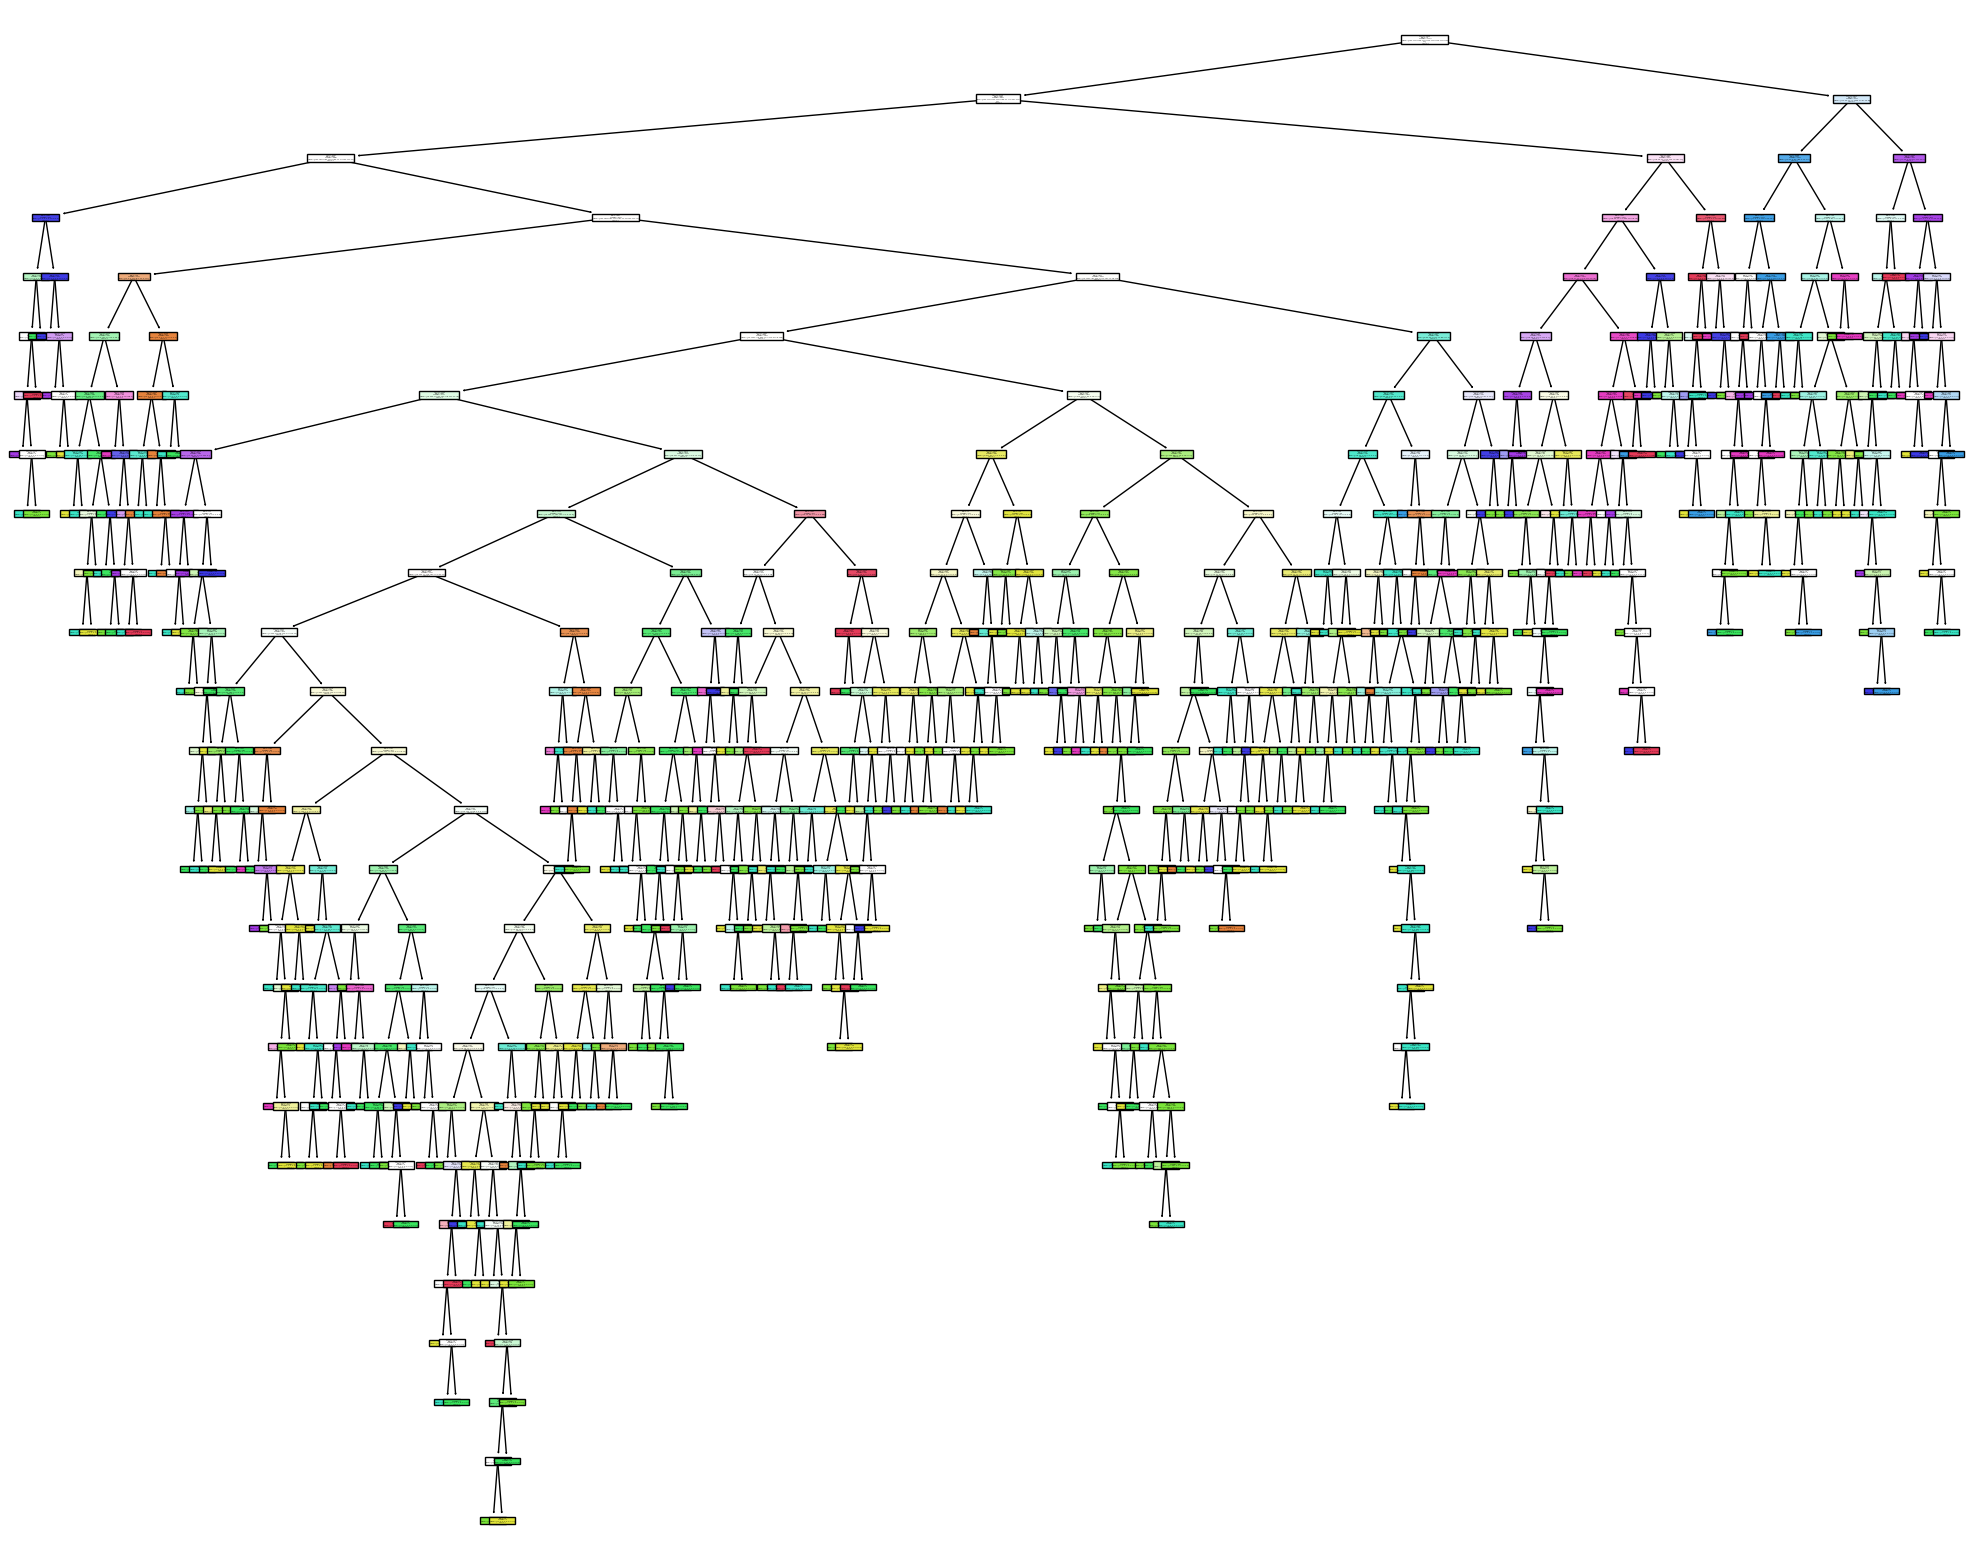

In [62]:
#Visualizing the decision tree
def visual_dt(X_data, y_data, clf_model)
    feature_names = pd.DataFrame(X_data).columns.tolist()
    class_names = np.unique(y_data).astype(str)

    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(clf_model, 
                       feature_names=feature_names,  
                       class_names=class_names,
                       filled=True)

visual_dt(X_data, y_data, clf_model)

### Cross Validation

In [87]:
#importing library for cross validation
from sklearn.model_selection import cross_val_score

In [88]:
#K-fold cross validation

# model = decision tree classifier model
# X_train = training dataset
# y_train = target column of training dataset
# k = number of folds

def cross_validation(model, X_train, y_train, k):
#   model.fit(X_train, y_train)
  # Applying 10-Fold Cross Validation
  scores = cross_val_score(model, X_train, y_train, cv = k, scoring='accuracy')
  #print("Model {gnb} - X_train: {X_train}   y_train: {y_train}")
  print('Average cross-validation score: {:.4f}'.format(scores.mean()))

In [89]:
# average cross validation on train dataset
cross_validation(clf_model_cv, X_data, y_data, 10)

Average cross-validation score: 0.9257


## Evaluation Metrics

In [90]:
#importing library for generating metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [91]:
y_test.shape

(4917, 1)

In [92]:
X_test.shape

(4917, 2304)

In [93]:
y_predict1.shape

(4917,)

In [94]:
def evaluationMetrics(model, X_train, y_train, X_test, y_test, y_pred):
    #check if model is overfitting or underfitting
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print()

    #checking Accuracy, Precision, Recall Score and Mean Absolute Error
    print('Model Accuracy Score : {:.4f}'.format(accuracy_score(y_test,y_pred)))
    print("Precision Score : {:.4f}".format(precision_score(y_test, y_pred, average='micro')))
    print("Recall Score : {:.4f}".format(recall_score(y_test, y_pred, average='micro')))
    print("Mean Absolute Error : {:.4f}".format(mean_absolute_error(y_test,y_pred)))
    print("F1 Score : {:.4f}".format(f1_score(y_test, y_pred, average='micro')))
    print()
    print()
    
    confusionMatrix = confusion_matrix(y_test, y_pred)
    
    #Visualizing a confusion matrix (using a heat map)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print the Confusion Matrix and slice it into four pieces
    FP = confusionMatrix.sum(axis=0) - np.diag(confusionMatrix)
    FN = confusionMatrix.sum(axis=1) - np.diag(confusionMatrix)
    TP = np.diag(confusionMatrix)
    TN = confusionMatrix.sum() - (FP + FN + TP)
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)

    # Specificity or true negative rate
    TNR = TN/(TN+FP)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    print(f"Sensitivity (true positive rate), for each class: {TPR}")
    print()
    print(f"Sensitivity (Avg): {np.mean(TPR)}")
    print()
    print("------------------------------------------------------------")
    print(f"Specificity (true negative rate), for each class: {TNR}")
    print()
    print(f"Specificity (Avg): {np.mean(TNR)}")
    print()
    print("------------------------------------------------------------")
    print(f"FP rate, for each class: {FPR}")
    print()
    print(f"FP rate (Avg): {np.mean(FPR)}")
    print()
    print("------------------------------------------------------------")
    print(f"FN rate, for each class: {FNR}")
    print()
    print(f"FN rate (Avg): {np.mean(FNR)}")
    print()
    print("------------------------------------------------------------")
    print(f"TP rate, for each class: {TPR}")
    print()
    print(f"TP rate (Avg): {np.mean(TPR)}")
    print()
    print("------------------------------------------------------------")
    print(f"TN rate, for each class: {TNR}")
    print()
    print(f"TN rate (Avg): {np.mean(TNR)}")

Training set score: 1.0000
Test set score: 0.9315

Model Accuracy Score : 0.9315
Precision Score : 0.9315
Recall Score : 0.9315
Mean Absolute Error : 0.1489
F1 Score : 0.9315




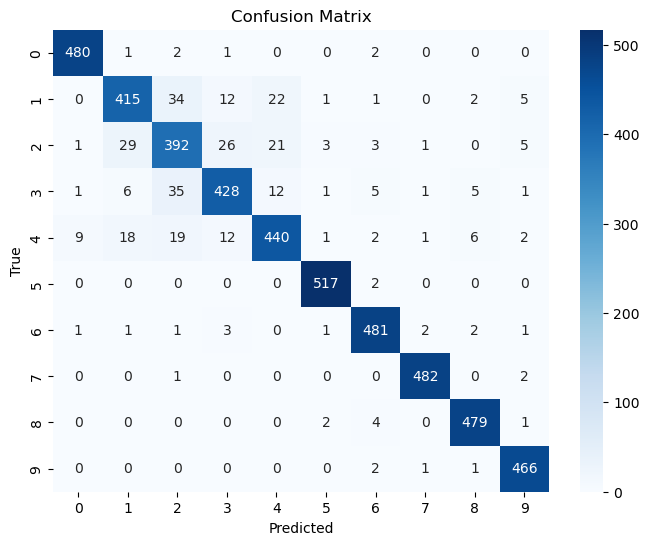

Sensitivity (true positive rate), for each class: [0.98765432 0.84349593 0.81496881 0.86464646 0.8627451  0.99614644
 0.97565923 0.99381443 0.98559671 0.99148936]

Sensitivity (Avg): 0.9316216800773967

------------------------------------------------------------
Specificity (true negative rate), for each class: [0.99729181 0.98757062 0.9792606  0.98778833 0.98751985 0.99795362
 0.99525316 0.99864621 0.99638908 0.9961772 ]

Specificity (Avg): 0.9923850474458227

------------------------------------------------------------
FP rate, for each class: [0.00270819 0.01242938 0.0207394  0.01221167 0.01248015 0.00204638
 0.00474684 0.00135379 0.00361092 0.0038228 ]

FP rate (Avg): 0.007614952554177226

------------------------------------------------------------
FN rate, for each class: [0.01234568 0.15650407 0.18503119 0.13535354 0.1372549  0.00385356
 0.02434077 0.00618557 0.01440329 0.00851064]

FN rate (Avg): 0.06837831992260338

------------------------------------------------------------

In [95]:
# printing the evaluation metrics for train test split data (70:30)
evaluationMetrics(clf_model, X_train, y_train, X_test, y_test, y_predict1)

Training set score: 1.0000
Test set score: 0.9242

Model Accuracy Score : 0.9486
Precision Score : 0.9486
Recall Score : 0.9486
Mean Absolute Error : 0.1117
F1 Score : 0.9486




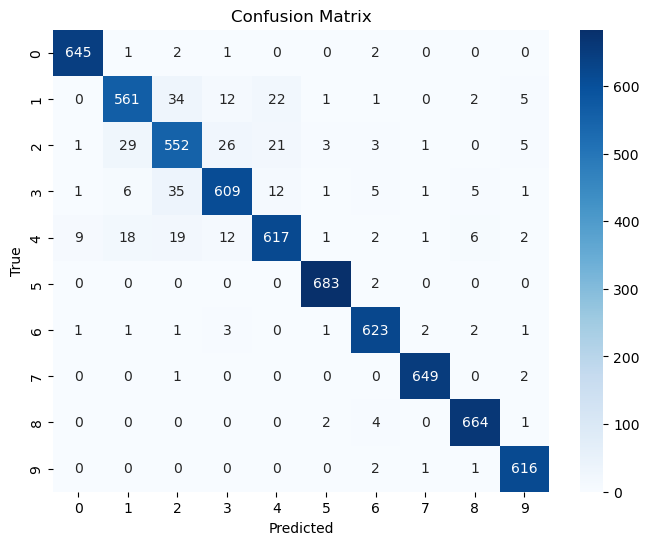

Sensitivity (true positive rate), for each class: [0.99078341 0.87931034 0.86115445 0.90088757 0.89810771 0.99708029
 0.98110236 0.99539877 0.98956781 0.99354839]

Sensitivity (Avg): 0.9486941113328158

------------------------------------------------------------
Specificity (true negative rate), for each class: [0.99796782 0.99070632 0.98444632 0.99081633 0.99062873 0.99846704
 0.9964533  0.99898374 0.99728122 0.99713612]

Specificity (Avg): 0.9942886945312152

------------------------------------------------------------
FP rate, for each class: [0.00203218 0.00929368 0.01555368 0.00918367 0.00937127 0.00153296
 0.0035467  0.00101626 0.00271878 0.00286388]

FP rate (Avg): 0.0057113054687847765

------------------------------------------------------------
FN rate, for each class: [0.00921659 0.12068966 0.13884555 0.09911243 0.10189229 0.00291971
 0.01889764 0.00460123 0.01043219 0.00645161]

FN rate (Avg): 0.051305888667184274

----------------------------------------------------------

In [97]:
# printing the evaluation metrics for train test split data (60:40)
evaluationMetrics(clf_model1, X_train1, y_train1, X_test1, y_test1, y_predict1_1)

Training set score: 1.0000
Test set score: 0.9359

Model Accuracy Score : 0.9301
Precision Score : 0.9301
Recall Score : 0.9301
Mean Absolute Error : 0.1507
F1 Score : 0.9301




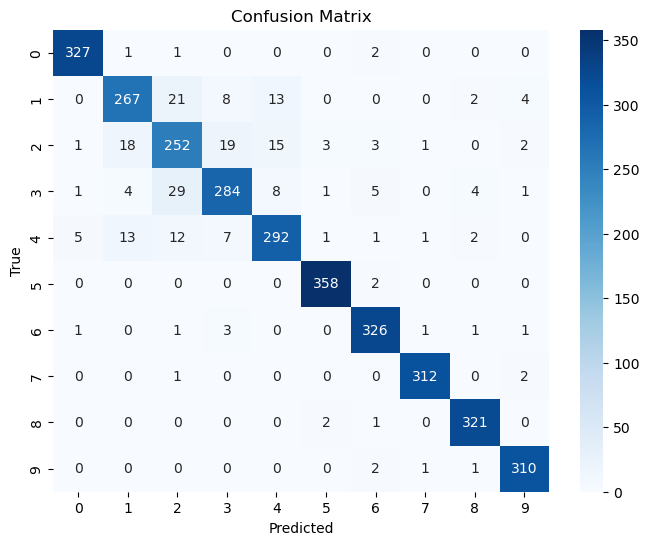

Sensitivity (true positive rate), for each class: [0.98791541 0.84761905 0.80254777 0.84272997 0.8742515  0.99444444
 0.9760479  0.99047619 0.99074074 0.98726115]

Sensitivity (Avg): 0.9294034119856874

------------------------------------------------------------
Specificity (true negative rate), for each class: [0.99728537 0.98785015 0.97807018 0.98741925 0.98777174 0.9976011
 0.99456522 0.99865002 0.99661476 0.99662618]

Specificity (Avg): 0.9922453957946697

------------------------------------------------------------
FP rate, for each class: [0.00271463 0.01214985 0.02192982 0.01258075 0.01222826 0.0023989
 0.00543478 0.00134998 0.00338524 0.00337382]

FP rate (Avg): 0.007754604205330301

------------------------------------------------------------
FN rate, for each class: [0.01208459 0.15238095 0.19745223 0.15727003 0.1257485  0.00555556
 0.0239521  0.00952381 0.00925926 0.01273885]

FN rate (Avg): 0.07059658801431254

------------------------------------------------------------
T

In [98]:
# printing the evaluation metrics for train test split data (80:20)
evaluationMetrics(clf_model2, X_train2, y_train2, X_test2, y_test2, y_predict1_2)

### Building classifier on Train and Test data

In [99]:
#Converting test dataframes into arrays
X_test_data = np.array(df_test)
y_test_data = np.array(test_y_df)

In [100]:
#Initializing model
#clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)  
clf_model_test = DecisionTreeClassifier()

#Training model
clf_model_test.fit(X_data,y_data)

DecisionTreeClassifier()

In [101]:
#Getting the predicted classes
y_predict2 = clf_model_test.predict(X_test_data)

In [102]:
#Printing confusion matrix for train test data
confusionMatrix = confusion_matrix(y_test_data, y_predict2)
print(confusionMatrix)

[[ 18  14   6   0  21   0   1   0   0   0]
 [ 18 457 114  39  77   1   4   1   3   6]
 [  9  42 605  39  48   0   3   2   0   2]
 [  1  29  51 324  28   0   1   0   6  10]
 [ 10  40  42  31 517   3   6   1   5   5]
 [  0   5   8   8   1  19   2   0   5  12]
 [  2   1   4   2   2   0  61   3   4  11]
 [  0   3   4   1  23   3   2  21   2   1]
 [  4  11   9  20   7   3  20   8  40  28]
 [  1   0   9  18   7   1  12   4   4  34]]


In [103]:
#Printing Classification Report for train test data
print(classification_report(y_test_data, y_predict2))

              precision    recall  f1-score   support

           0       0.29      0.30      0.29        60
           1       0.76      0.63      0.69       720
           2       0.71      0.81      0.76       750
           3       0.67      0.72      0.70       450
           4       0.71      0.78      0.74       660
           5       0.63      0.32      0.42        60
           6       0.54      0.68      0.60        90
           7       0.53      0.35      0.42        60
           8       0.58      0.27      0.37       150
           9       0.31      0.38      0.34        90

    accuracy                           0.68      3090
   macro avg       0.57      0.52      0.53      3090
weighted avg       0.68      0.68      0.67      3090



Training set score: 1.0000
Test set score: 0.6783

Model Accuracy Score : 0.6783
Precision Score : 0.6783
Recall Score : 0.6783
Mean Absolute Error : 0.7887
F1 Score : 0.6783




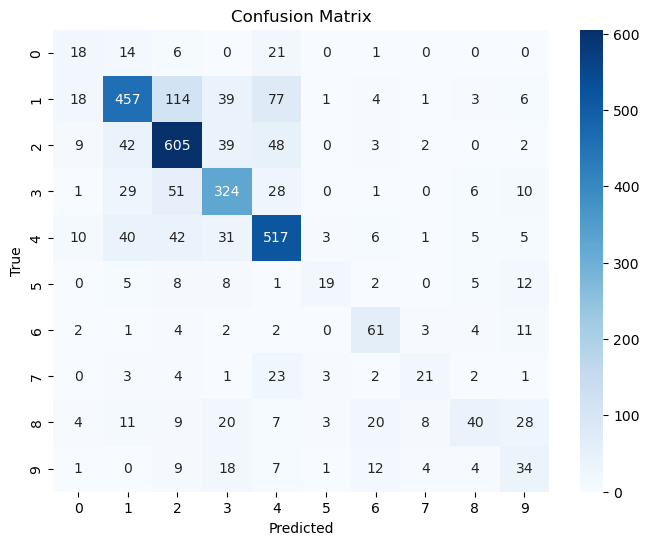

Sensitivity (true positive rate), for each class: [0.3        0.63472222 0.80666667 0.72       0.78333333 0.31666667
 0.67777778 0.35       0.26666667 0.37777778]

Sensitivity (Avg): 0.5233611111111112

------------------------------------------------------------
Specificity (true negative rate), for each class: [0.98514851 0.93881857 0.89444444 0.94015152 0.91193416 0.99636964
 0.983      0.99372937 0.99013605 0.975     ]

Specificity (Avg): 0.9608732260549647

------------------------------------------------------------
FP rate, for each class: [0.01485149 0.06118143 0.10555556 0.05984848 0.08806584 0.00363036
 0.017      0.00627063 0.00986395 0.025     ]

FP rate (Avg): 0.03912677394503517

------------------------------------------------------------
FN rate, for each class: [0.7        0.36527778 0.19333333 0.28       0.21666667 0.68333333
 0.32222222 0.65       0.73333333 0.62222222]

FN rate (Avg): 0.4766388888888889

------------------------------------------------------------
T

In [104]:
#printing the evaluation metrics on the train and test data model
evaluationMetrics(clf_model_test, X_data, y_data, X_test_data, y_test_data, y_predict2)

# Asmitha's Part

In [105]:
# Importing necessary libraries for decision tree classifier  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [106]:
# A function for decison tree classifer
def drtclassifier(concat_x,concat_y,x_train,y_traindata):
    clf_model = DecisionTreeClassifier() #Initializing the object
    clf_model.fit(x_train, y_traindata) 

    # Now, you can use the trained model for prediction
    y_predict = clf_model.predict(concat_x) 

    # Calculate the confusion matrix
    confusionMatrix = confusion_matrix(concat_y, y_predict) 
    print(confusionMatrix)
    evaluationMetrics(clf_model, x_train, y_traindata, concat_x, concat_y, y_predict)


In [107]:
# Function for splitting the data
def split_data(i,x_train,y_traindata): # i = 0.30 or 0.60 for the split , x_train=> df , y_traindata = train_y_df


    ##Load the data from CSV files
    # df = pd.read_csv("x_train_all.csv")
    # train_y_df = pd.read_csv("y_train_all.csv")
    # df_test = pd.read_csv("x_test_all.csv")
    # test_y_df = pd.read_csv("y_test_all.csv")
    # X_d = df.copy()
    # y_d = train_y_df.copy()

    print("Splitting the data for",i,"%")
    # Splitting the data according to the value of i 
    
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_traindata, test_size=i, random_state=42)
    
    df_x = pd.concat([df_test, X_test], axis=0) #Concatenating df_test and X_test 
    test_y_df_list = test_y_df.values.tolist() # Converting test_y_df to list
    y_test = y_test.values.tolist()

    for i in y_test:
        test_y_df_list.append(i) #Concatenating y_test and test_y_df
    df_y = pd.DataFrame(test_y_df_list) #Converting the test_y_df to dataframe
  
    # Calling drt classifier 
    drtclassifier(df_x,df_y,x_train,y_traindata) #Passing the variables to call the function

Splitting the data for 0.3 %
[[ 511    9    3    2   21    0    0    0    0    0]
 [  21  941  101   34   90    2    4    5    5    9]
 [   4   37 1097   41   39    1    2    3    1    6]
 [   3   25   43  842   22    0    3    1    2    4]
 [   8   42   53   27 1016    5    9    1    1    8]
 [   2    1    6    8    2  542    3    0    3   12]
 [   0   14    3    2    7    1  536    0   10   10]
 [   0   24    3    0    8    1    2  506    1    0]
 [   1    7    4   22    9    0   24   12  527   30]
 [   1    1   14   13    0    1    2    4    5  519]]
Training set score: 1.0000
Test set score: 0.8789

Model Accuracy Score : 0.8789
Precision Score : 0.8789
Recall Score : 0.8789
Mean Absolute Error : 0.3102
F1 Score : 0.8789




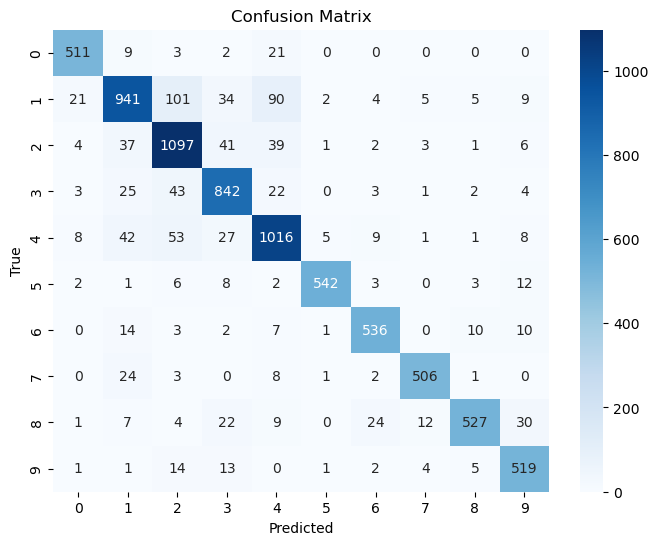

Sensitivity (true positive rate), for each class: [0.93589744 0.77640264 0.89114541 0.89100529 0.86837607 0.93609672
 0.9193825  0.92844037 0.82861635 0.92678571]

Sensitivity (Avg): 0.8902148502006154

------------------------------------------------------------
Specificity (true negative rate), for each class: [0.99463879 0.97645327 0.96605667 0.97890116 0.97103993 0.99851912
 0.99339978 0.99651568 0.99620133 0.9893917 ]

Specificity (Avg): 0.9861117436044061

------------------------------------------------------------
FP rate, for each class: [0.00536121 0.02354673 0.03394333 0.02109884 0.02896007 0.00148088
 0.00660022 0.00348432 0.00379867 0.0106083 ]

FP rate (Avg): 0.013888256395593985

------------------------------------------------------------
FN rate, for each class: [0.06410256 0.22359736 0.10885459 0.10899471 0.13162393 0.06390328
 0.0806175  0.07155963 0.17138365 0.07321429]

FN rate (Avg): 0.10978514979938454

------------------------------------------------------------

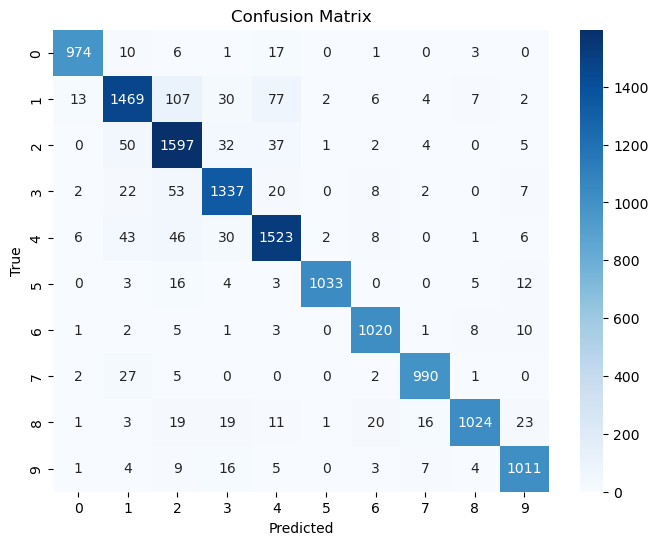

Sensitivity (true positive rate), for each class: [0.96245059 0.85556203 0.92418981 0.92143349 0.91471471 0.96003717
 0.97050428 0.96397274 0.90061566 0.95377358]

Sensitivity (Avg): 0.932725407596888

------------------------------------------------------------
Specificity (true negative rate), for each class: [0.99781733 0.98536629 0.97624151 0.98840757 0.98463451 0.99949359
 0.99578876 0.99714214 0.99753966 0.99452124]

Specificity (Avg): 0.9916952600597713

------------------------------------------------------------
FP rate, for each class: [0.00218267 0.01463371 0.02375849 0.01159243 0.01536549 0.00050641
 0.00421124 0.00285786 0.00246034 0.00547876]

FP rate (Avg): 0.008304739940228841

------------------------------------------------------------
FN rate, for each class: [0.03754941 0.14443797 0.07581019 0.07856651 0.08528529 0.03996283
 0.02949572 0.03602726 0.09938434 0.04622642]

FN rate (Avg): 0.06727459240311187

------------------------------------------------------------


In [108]:
split_data(0.30,df, train_y_df)
split_data(0.60,df, train_y_df)

### CONCLUSION OF DATA SPLITTING

•   In both splits, the training set score is 100% so it indicates a potential over fitting 
problem because the model perfectly fits the training data.
•   The test set scores are lower than the training set scores, which suggests some degree of overfitting, especially in the 30% split
•   The 60% split performs better on the test set, suggesting that a larger testing set might mitigate overfitting to some extent.

# Random Forest 

In [109]:
# Importing all the relevant libraries needed.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [110]:
# Splitting the training data into train and test data
X_data = np.array(df)
y_data = np.array(train_y_df)
# Splitting the dataset into train and test in (70:30)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3,random_state=42)

In [111]:
# Intializing RandomForestClassifier model
rf_model = RandomForestClassifier()
rf_model_cv = RandomForestClassifier() 

# Training the RandomForestClassifier model
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier()

### Using Random Forest Classifier on training set and measuring Accuracy

In [113]:
# Getting the predicted classes
y_pdt = rf_model.predict(X_test)

In [114]:
#Evaluating the accuracy of the model
accuracy_score(y_test,y_pdt)

0.9943054708155379

In [115]:
#Printing confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pdt)
print(confusionMatrix)

[[486   0   0   0   0   0   0   0   0   0]
 [  0 482   5   1   3   0   0   0   1   0]
 [  0   1 471   6   2   0   1   0   0   0]
 [  0   0   0 495   0   0   0   0   0   0]
 [  0   1   3   3 503   0   0   0   0   0]
 [  0   0   0   0   0 519   0   0   0   0]
 [  0   0   1   0   0   0 492   0   0   0]
 [  0   0   0   0   0   0   0 485   0   0]
 [  0   0   0   0   0   0   0   0 486   0]
 [  0   0   0   0   0   0   0   0   0 470]]


In [116]:
#Printing Classification Report
print(classification_report(y_test, y_pdt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      0.98      0.99       492
           2       0.98      0.98      0.98       481
           3       0.98      1.00      0.99       495
           4       0.99      0.99      0.99       510
           5       1.00      1.00      1.00       519
           6       1.00      1.00      1.00       493
           7       1.00      1.00      1.00       485
           8       1.00      1.00      1.00       486
           9       1.00      1.00      1.00       470

    accuracy                           0.99      4917
   macro avg       0.99      0.99      0.99      4917
weighted avg       0.99      0.99      0.99      4917



In [117]:
# Getting the average cross validation on the train dataset
cross_validation(rf_model_cv, X_data, y_data.ravel(), 10)

Average cross-validation score: 0.9833


Training set score: 1.0000
Test set score: 0.9943

Model Accuracy Score : 0.9943
Precision Score : 0.9943
Recall Score : 0.9943
Mean Absolute Error : 0.0110
F1 Score : 0.9943




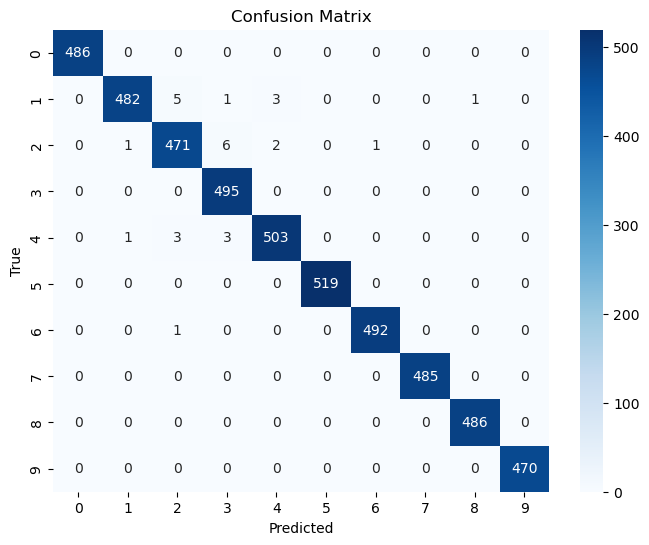

Sensitivity (true positive rate), for each class: [1.         0.9796748  0.97920998 1.         0.98627451 1.
 0.9979716  1.         1.         1.        ]

Sensitivity (Avg): 0.9943130888195946

------------------------------------------------------------
Specificity (true negative rate), for each class: [1.         0.99954802 0.99797115 0.99773858 0.99886544 1.
 0.99977396 1.         0.99977432 1.        ]

Specificity (Avg): 0.9993671466473014

------------------------------------------------------------
FP rate, for each class: [0.         0.00045198 0.00202885 0.00226142 0.00113456 0.
 0.00022604 0.         0.00022568 0.        ]

FP rate (Avg): 0.0006328533526985817

------------------------------------------------------------
FN rate, for each class: [0.         0.0203252  0.02079002 0.         0.01372549 0.
 0.0020284  0.         0.         0.        ]

FN rate (Avg): 0.005686911180405466

------------------------------------------------------------
TP rate, for each class: [1. 

In [118]:
# Getting the evaluation metrics for train test split data
evaluationMetrics(rf_model, X_train, y_train, X_test, y_test, y_pdt)

### Building classifier on Train and Test data

In [119]:
# Intializing the model for the test.
rf_model_test = RandomForestClassifier()

#Training model for the test.
rf_model_test.fit(X_data,y_data.ravel())

RandomForestClassifier()

In [120]:
# Getting the predicted classes 
y_pdt2 = rf_model_test.predict(X_test_data)

In [121]:
# Printing confusion matrix for train test data
confusionMatrix = confusion_matrix(y_test_data, y_pdt2)
print(confusionMatrix)

[[ 17  13   2   0  28   0   0   0   0   0]
 [  0 614  76   5  25   0   0   0   0   0]
 [  0  25 709  13   3   0   0   0   0   0]
 [  0  12  12 424   2   0   0   0   0   0]
 [  0  33  17  17 588   0   5   0   0   0]
 [  0   0   3   0   0  35   0   0   0  22]
 [  0   0   0   2   0   0  79   0   9   0]
 [  0  26   2   0   0   0   0  26   0   6]
 [  0   6  11  25   2   0  24   7  51  24]
 [  1   1   7   2   1   1   4   2  10  61]]


In [122]:
#Printing Classification Report for train test data
print(classification_report(y_test_data, y_pdt2))

              precision    recall  f1-score   support

           0       0.94      0.28      0.44        60
           1       0.84      0.85      0.85       720
           2       0.85      0.95      0.89       750
           3       0.87      0.94      0.90       450
           4       0.91      0.89      0.90       660
           5       0.97      0.58      0.73        60
           6       0.71      0.88      0.78        90
           7       0.74      0.43      0.55        60
           8       0.73      0.34      0.46       150
           9       0.54      0.68      0.60        90

    accuracy                           0.84      3090
   macro avg       0.81      0.68      0.71      3090
weighted avg       0.84      0.84      0.83      3090



Training set score: 1.0000
Test set score: 0.8427

Model Accuracy Score : 0.8427
Precision Score : 0.8427
Recall Score : 0.8427
Mean Absolute Error : 0.4091
F1 Score : 0.8427




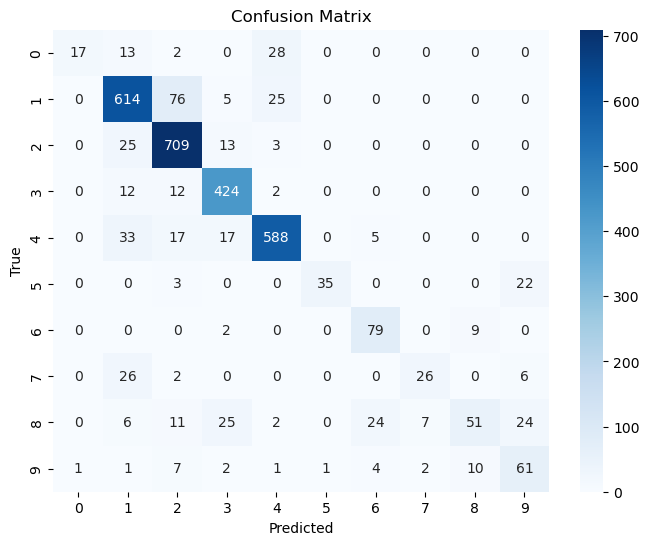

Sensitivity (true positive rate), for each class: [0.28333333 0.85277778 0.94533333 0.94222222 0.89090909 0.58333333
 0.87777778 0.43333333 0.34       0.67777778]

Sensitivity (Avg): 0.6826797979797979

------------------------------------------------------------
Specificity (true negative rate), for each class: [0.99966997 0.95105485 0.94444444 0.97575758 0.97489712 0.99966997
 0.989      0.9970297  0.99353741 0.98266667]

Specificity (Avg): 0.980772771046061

------------------------------------------------------------
FP rate, for each class: [0.00033003 0.04894515 0.05555556 0.02424242 0.02510288 0.00033003
 0.011      0.0029703  0.00646259 0.01733333]

FP rate (Avg): 0.01922722895393915

------------------------------------------------------------
FN rate, for each class: [0.71666667 0.14722222 0.05466667 0.05777778 0.10909091 0.41666667
 0.12222222 0.56666667 0.66       0.32222222]

FN rate (Avg): 0.31732020202020206

------------------------------------------------------------
T

In [123]:
#printing the evaluation metrics on the train and test data model
evaluationMetrics(rf_model_test, X_data, y_data, X_test_data, y_test_data, y_pdt2)

### Experimenting the parameters

In [124]:
from sklearn.model_selection import GridSearchCV, train_test_split
def para_tune_r():
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
    param_grid = {
        'n_estimators': [50,100],
        'max_depth': [10,20],
        'min_samples_split': [2,5],
        'min_samples_leaf': [1,2],
        'criterion': ['gini', 'entropy']
    }
    rf_classifier = RandomForestClassifier()
    grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train.ravel())
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    y_pred = grid_search.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [125]:
para_tune_r()

KeyboardInterrupt: 

### Spliting the dataset

In [ ]:
# A function for trains the RandomForestClassifer and calls evaluationMetrics to access the performance.
def rftclassifier(concat_x,concat_y,x_train,y_traindata):
    rf_model = RandomForestClassifier() #Initializing the object
    rf_model.fit(x_train, y_traindata) 

    # Makes the predictions for the dataset
    y_pdt2 = rf_model.predict(concat_x) 

    # Calculate the confusion matrix
    confusionMatrix = confusion_matrix(concat_y, y_pdt2) 
    print(confusionMatrix)
    evaluationMetrics(rf_model, x_train, y_traindata, concat_x, concat_y, y_pdt2)


In [ ]:
# Function for splitting the dataset 
def split_data(i,x_train,y_traindata): # i = 0.30 or 0.60 for the split , x_train=> df , y_traindata = train_y_df

    print("Splitting the data for",i,"%")
    # Splitting the data according to the value of i 
    
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_traindata, test_size=i, random_state=42)
    
    df_x = pd.concat([df_test, X_test], axis=0) #Concatenating df_test and X_test 
    test_y_df_list = test_y_df.values.tolist() # Converting test_y_df to list
    y_test = y_test.values.tolist()

    for i in y_test:
        test_y_df_list.append(i) #Concatenating y_test and test_y_df
    df_y = pd.DataFrame(test_y_df_list) #Converting the test_y_df to dataframe
  
    # Calling drt classifier 
    rftclassifier(df_x,df_y,x_train,y_traindata) #Passing the variables to call the function

In [ ]:
split_data(0.30,df, train_y_df)
split_data(0.60,df, train_y_df)

# ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Splitting the training data into train and test data
X_data = np.array(df)
y_data = np.array(train_y_df)
# Splitting the dataset into train and test in (70:30)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3,random_state=42)

In [ ]:
# Intializing ExtraTreesClassifier model
y_train_flattened = y_train.ravel()
et_model = ExtraTreesClassifier()
et_model_cv = ExtraTreesClassifier()
# Training the ExtraTreesClassifier model
et_model.fit(X_train, y_train_flattened)

### Using Extra Trees Classifier on training set and measuring Accuracy

In [ ]:
# Getting the predicted classes
y_pdt = et_model.predict(X_test)

In [ ]:
#Evaluating the accuracy of the model
accuracy_score(y_test,y_pdt)

In [ ]:
#Printing confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pdt)
print(confusionMatrix)

In [ ]:
#Printing Classification Report
print(classification_report(y_test, y_pdt))

In [ ]:
# Getting the average cross validation on the train dataset
cross_validation(et_model_cv, X_data, y_data.ravel(), 10)

In [ ]:
# Getting the evaluation metrics for train test split data
evaluationMetrics(et_model, X_train, y_train, X_test, y_test, y_pdt)

### Building classifier on Train and Test data

In [ ]:
# Intializing the model for the test.
et_model_test = ExtraTreesClassifier()

#Training model for the test.
et_model_test.fit(X_data,y_data.ravel())

In [ ]:
# Getting the predicted classes 
y_pdt2 = et_model_test.predict(X_test_data)

In [ ]:
# Printing confusion matrix for train test data
confusionMatrix = confusion_matrix(y_test_data, y_pdt2)
print(confusionMatrix)

In [ ]:
#Printing Classification Report for train test data
print(classification_report(y_test_data, y_pdt2))

In [ ]:
#printing the evaluation metrics on the train and test data model
evaluationMetrics(et_model_test, X_data, y_data, X_test_data, y_test_data, y_pdt2)

### Experimenting the parameters

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
def para_tune():
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
    param_grid = {
        'n_estimators': [50,100],
        'max_depth': [10, 20],
        'min_samples_split': [2,5],
        'min_samples_leaf': [1,2],
        'criterion': ['gini', 'entropy']
    }
    et_classifier = ExtraTreesClassifier()
    grid_search = GridSearchCV(et_classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train.ravel())
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    y_pred = grid_search.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
para_tune()

### Spliting the dataset

In [ ]:
# A function for decison tree classifer
def etclassifier(concat_x,concat_y,x_train,y_traindata):
    et_model = ExtraTreesClassifier() #Initializing the object
    et_model.fit(x_train, y_traindata) 

    # Now, you can use the trained model for prediction
    y_pdt2 = et_model.predict(concat_x) 

    # Calculate the confusion matrix
    confusionMatrix = confusion_matrix(concat_y, y_pdt2) 
    print(confusionMatrix)
    evaluationMetrics(et_model, x_train, y_traindata, concat_x, concat_y, y_pdt2)


In [ ]:
# Function for splitting the data
def split_data(i,x_train,y_traindata): # i = 0.30 or 0.60 for the split , x_train=> df , y_traindata = train_y_df

    print("Splitting the data for",i,"%")
    # Splitting the data according to the value of i 
    
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_traindata, test_size=i, random_state=42)
    
    df_x = pd.concat([df_test, X_test], axis=0) #Concatenating df_test and X_test 
    test_y_df_list = test_y_df.values.tolist() # Converting test_y_df to list
    y_test = y_test.values.tolist()

    for i in y_test:
        test_y_df_list.append(i) #Concatenating y_test and test_y_df
    df_y = pd.DataFrame(test_y_df_list) #Converting the test_y_df to dataframe
  
    # Calling drt classifier 
    etclassifier(df_x,df_y,x_train,y_traindata) #Passing the variables to call the function

In [ ]:
split_data(0.30,df, train_y_df)
split_data(0.60,df, train_y_df)